In [1]:
from citipy import citipy
import csv
import kdtree
import os
import random
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import openweathermapy as ow

#test that citpy library is working
city = citipy.nearest_city(22.99, 120.21)
city

print(city.city_name)     # Tainan, my home town

print(city.country_code)   # And the country is surely Taiwan

tainan
tw


In [2]:
#use numpy random unifrom function to get evently spaced latitudes and longitudes (-90 to 90, -180 to 180)
#populate one list for lat, one for long
lat_list = np.random.uniform(-90, 90, 10)
lon_list = np.random.uniform(-180, 180, 10)

#print(lat_list)
#print(lon_list)


In [3]:
#use citipy to generate cities and country code for those lists
city_list = []
country_list = []

for (lat, lon) in zip(lat_list, lon_list):
    
    city = citipy.nearest_city(lat, lon)
  
    city_list.append(city.city_name)
    country_list.append(city.country_code)
    
#print(city_list)
#print(country_list)

In [4]:
#turn that into a dataframe
cities_df = pd.DataFrame(np.column_stack([lat_list, lon_list, city_list, country_list]), 
                               columns=['Input Latitude', 'Input Longitude', 'City', 'Country Code'])
cities_df.head()

,Input Latitude,Input Longitude,City,Country Code
0,17.58066853094401,97.73423345519751,thaton,mm
1,37.830690332858765,43.870081964766115,hakkari,tr
2,47.65968041020457,-159.2768436540601,kodiak,us
3,-16.715156306423538,118.28873557333901,port hedland,au
4,-73.84453495010011,53.773002402804224,east london,za


In [5]:
#take the inputs out of df so we have a clean df to send to csv
reduced_cities_df = cities_df[['City', 'Country Code']]
print(reduced_cities_df)

           City Country Code
0        thaton           mm
1       hakkari           tr
2        kodiak           us
3  port hedland           au
4   east london           za
5   yellowknife           ca
6         vaini           to
7       husavik           is
8   provideniya           ru
9        bethel           us


In [6]:
#turn it into a csv inorder to hit the openweather api, loop through 
reduced_cities_df.to_csv("Output/cities.csv", encoding="utf-8", index=False, header=False)

In [7]:
# Create a settings object with your API key and preferred units
#api_key = "85e7df885565606034ad67f99611b82f"

#settings = {"units": "imperial", "appid": api_key}

#cities = []
#real_lat = []
#real_lon = []
#temp = []
#hum = []
#cloud = []
#wind = []

In [8]:
# Get data for each city in cities.csv
#with open("output/cities.csv") as cityfile:
    #cityData = csv.reader(cityfile)
    #for city in cityData:
        #cities.append(city[0])

#print(cities)    
    
#for city in cities:
    #weather_data = ow.get_current(city, **settings)
    #real_lat.append(weather_data["coord"]["lat"])
    #real_lon.append(weather_data["coord"]["lon"])
    #temp.append(weather_data["main"]["temp"])
    #hum.append(weather_data["main"]["humidity"])
    #cloud.append(weather_data["clouds"]["all"])
    #wind.append(weather_data["wind"]["speed"])

#print(real_lat)
#print(real_lon)
#print(temp)
#print(hum)
#print(cloud)
#print(wind)



In [9]:
#api.openweathermap.org/data/2.5/weather?q={city name},{country code}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "85e7df885565606034ad67f99611b82f"


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [10]:
# Pretty print the json for a test country to see the response data
#response = requests.get(query_url + "saint george" + "," + "bm")
#print(json.dumps(response, indent=4, sort_keys=True))

In [11]:
# set up lists to hold reponse info
real_lat = []
real_lon = []
temp = []
hum = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
# Sometimes getting an error for the coord of a city, so incorporate a try-except to skip any that 
#are missing a data point.
#try:

for (city, country) in zip(city_list, country_list):
    city_data = requests.get(query_url + city).json()
    real_lat.append(city_data["coord"]["lat"])
    real_lon.append(city_data["coord"]["lon"])
    temp.append(city_data["main"]["temp"])
    hum.append(city_data["main"]["humidity"])
    cloud.append(city_data["clouds"]["all"])
    wind.append(city_data["wind"]["speed"])
#except (KeyError, ValueError):
        #real_lat.append("NaN")
        #real_lon.append("NaN")
        #temp.append("NaN")
        #hum.append("NaN")
        #cloud.append("NaN")
        #wind.append("NaN")
    
#print(f"The latitude information received is: {real_lat}")
#print(f"The longitude information received is: {real_lon}")
#print(f"The temperature information received is: {temp}")
#print(f"The humidity information received is: {hum}")
#print(f"The cloudiness information received is: {cloud}")
#print(f"The wind speed information received is: {wind}")




In [12]:
weather_dict = {
    "city": city_list,
    "country code": country_list,
    "lat": real_lat,
    "lon": real_lon,
    "temp": temp,
    "humidity": hum,
    "cloudiness": cloud,
    "wind speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,cloudiness,country code,humidity,lat,lon,temp,wind speed
0,thaton,24,mm,98,16.91,97.37,79.47,2.71
1,hakkari,40,tr,86,61.34,23.75,26.60,9.17
2,kodiak,90,us,92,39.95,-94.76,32.00,12.75
3,port hedland,0,au,83,-20.31,118.58,78.80,8.05
4,east london,76,za,98,-33.02,27.91,75.15,12.21


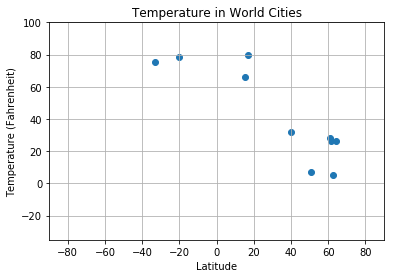

In [13]:
# Build a scatter plot for temp, hum, cloud, wind vs lat
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-35, 100)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

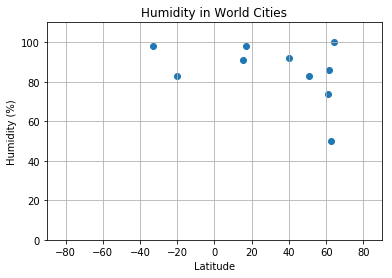

In [14]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(0, 110)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

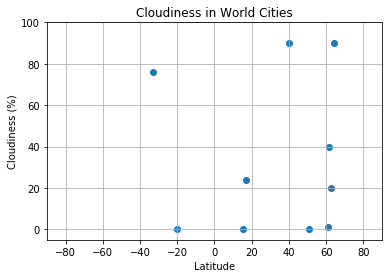

In [15]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(-5, 100)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

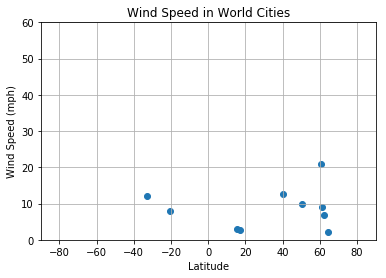

In [16]:
plt.scatter(weather_data["lat"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(0, 60)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [17]:
#Soo... the script above runs fine... sometimes. Sometimes, I get a "coord" error in the for loop when I ping 
#the Openweather API, almost as though sometimes the API doesn't recognize some of the cities generated. I tried to 
#write a try/except for this so that it places Nan in the list if the API doesn't find a coordinate for a city, but
#that didn't seem to work for me. I've saved the code here to show that it can and does run... it just doesn't always
#run like this. I'd love to go over how to best debug this.

In [ ]:
#Observable trends:
#1. The closer the latitude to zero, the higher the temp. (Duh.)
#2. Need larger city size to see trends for the others...